In [1]:
'''
Name: Jason Domzalski
Class: CIS-2532-NET01 Advanced Python Programming
Date: 5/6/2022
File: Coding Companion for Intuitive Deep Learning Part 1 Jason Domzalski
Description: Example of Deep learning from house price data. Code is written by josephlee94
from github https://github.com/josephlee94/intuitive-deep-learning/blob/master/Part%201:%20Predicting%20House%20Prices/Coding%20Companion%20for%20Intuitive%20Deep%20Learning%20Part%201%20Annotated.ipynb

'''
import pandas as pd

In [2]:
df = pd.read_csv('housepricedata.csv')

In [3]:
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [4]:
dataset = df.values

In [5]:
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]], dtype=int64)

In [6]:
X = dataset[:,0:10]
Y = dataset[:,10]

In [7]:
from sklearn import preprocessing

In [8]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [9]:
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [12]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [13]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [14]:
from keras.models import Sequential
from keras.layers import Dense

In [15]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [16]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [17]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6932 - accuracy: 0.4442 - val_loss: 0.6897 - val_accuracy: 0.4658
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6853 - accuracy: 0.5039 - val_loss: 0.6838 - val_accuracy: 0.4886
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6798 - accuracy: 0.5049 - val_loss: 0.6791 - val_accuracy: 0.4886
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6752 - accuracy: 0.5059 - val_loss: 0.6749 - val_accuracy: 0.4886
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6708 - accuracy: 0.5059 - val_loss: 0.6707 - val_accuracy: 0.4932
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6666 - accuracy: 0.5254 - val_loss: 0.6665 - val_accuracy: 0.4977
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6625 - accuracy: 0.5431 - val_loss: 0.6623 - val_accuracy: 0.5205
Epoch 8/100
3

Epoch 59/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3687 - accuracy: 0.8650 - val_loss: 0.3575 - val_accuracy: 0.8493
Epoch 60/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3656 - accuracy: 0.8689 - val_loss: 0.3539 - val_accuracy: 0.8493
Epoch 61/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3622 - accuracy: 0.8650 - val_loss: 0.3502 - val_accuracy: 0.8493
Epoch 62/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3589 - accuracy: 0.8699 - val_loss: 0.3468 - val_accuracy: 0.8539
Epoch 63/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3565 - accuracy: 0.8699 - val_loss: 0.3434 - val_accuracy: 0.8539
Epoch 64/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3535 - accuracy: 0.8757 - val_loss: 0.3404 - val_accuracy: 0.8584
Epoch 65/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3512 - accuracy: 0.8708 - val_loss: 0.3372 - val_accuracy: 0.8584
Epoch 

In [18]:
model.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 500us/step - loss: 0.2752 - accuracy: 0.8995


0.8995434045791626

In [19]:
import matplotlib.pyplot as plt

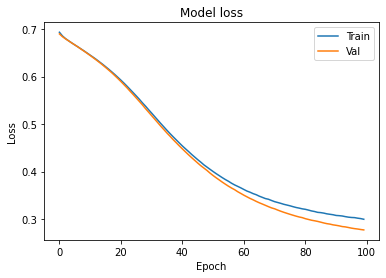

In [20]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [21]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

KeyError: 'acc'

In [22]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 1s 17ms/step - loss: 0.4734 - accuracy: 0.7857 - val_loss: 0.3626 - val_accuracy: 0.8493
Epoch 2/100
32/32 [==============================] - 0s 15ms/step - loss: 0.3783 - accuracy: 0.8523 - val_loss: 0.3071 - val_accuracy: 0.8813
Epoch 3/100
32/32 [==============================] - 0s 15ms/step - loss: 0.3128 - accuracy: 0.8767 - val_loss: 0.2809 - val_accuracy: 0.8950
Epoch 4/100
32/32 [==============================] - 0s 15ms/step - loss: 0.2821 - accuracy: 0.8816 - val_loss: 0.2951 - val_accuracy: 0.8950
Epoch 5/100
32/32 [==============================] - 0s 15ms/step - loss: 0.2793 - accuracy: 0.8865 - val_loss: 0.3189 - val_accuracy: 0.8767
Epoch 6/100
32/32 [==============================] - 0s 15ms/step - loss: 0.2960 - accuracy: 0.8777 - val_loss: 0.3075 - val_accuracy: 0.8904
Epoch 7/100
32/32 [==============================] - 0s 15ms/step - loss: 0.2611 - accuracy: 0.8826 - val_loss: 0.3420 - val_accuracy: 0.8904
Epoch 

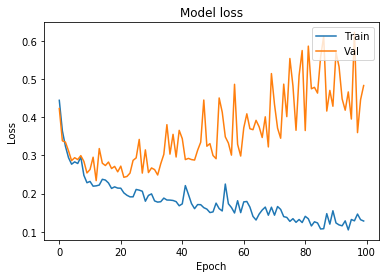

In [23]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

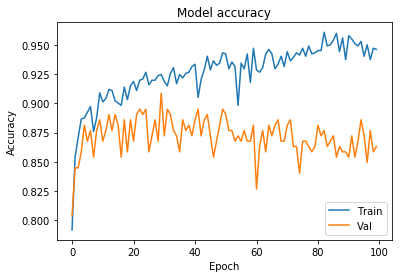

In [24]:
plt.plot(hist_2.history['acc'])
plt.plot(hist_2.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [25]:
from keras.layers import Dropout
from keras import regularizers

In [26]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [27]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 4s 4ms/step - loss: 14.3553 - acc: 0.6644 - val_loss: 3.9405 - val_acc: 0.7032
Epoch 2/100
1022/1022 [==============================] - 3s 3ms/step - loss: 1.6741 - acc: 0.8346 - val_loss: 0.6663 - val_acc: 0.8356
Epoch 3/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.5775 - acc: 0.8650 - val_loss: 0.5372 - val_acc: 0.8447
Epoch 4/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.5513 - acc: 0.8444 - val_loss: 0.5168 - val_acc: 0.8584
Epoch 5/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.5378 - acc: 0.8532 - val_loss: 0.5817 - val_acc: 0.8539
Epoch 6/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.5064 - acc: 0.8738 - val_loss: 0.4867 - val_acc: 0.8447
Epoch 7/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.4793 - acc: 0.8728 - val_loss: 0.4744 - val_acc: 0.8584
Epoch 8

Epoch 61/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.4310 - acc: 0.8855 - val_loss: 0.4458 - val_acc: 0.8584
Epoch 62/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.4380 - acc: 0.8855 - val_loss: 0.4518 - val_acc: 0.8676
Epoch 63/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.4400 - acc: 0.8845 - val_loss: 0.4542 - val_acc: 0.8630
Epoch 64/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.4267 - acc: 0.8953 - val_loss: 0.4671 - val_acc: 0.8539
Epoch 65/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.4308 - acc: 0.8924 - val_loss: 0.4597 - val_acc: 0.8630
Epoch 66/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.4338 - acc: 0.8904 - val_loss: 0.4571 - val_acc: 0.8584
Epoch 67/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.4284 - acc: 0.8845 - val_loss: 0.5106 - val_acc: 0.8539
Epoch 68/100
1022/1022 [========================

In [23]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

NameError: name 'hist_3' is not defined

In [24]:
plt.plot(hist_3.history['acc'])
plt.plot(hist_3.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

NameError: name 'hist_3' is not defined